# Data exploration of blood markers directly available in ADNI

In this jupyter notebook I explore the available data in ADNI1 and ADNI2 on white matter hyperintensities.
Main objectives:
* Assess if there is longitudinal data available
* Check if the data can be correlated to the location in the MRI scan
* Assess level of missing data
* Obtain ideas on how this could be used and analyzed, in conjunction with longitudinal evolution of patients or brain
* Plot the data in two points for each marker and check how it looks across different 

First, load the data:

In [20]:
import pandas as pd
import numpy as np

df_adni_plasmaqc = pd.read_csv('Blood/adni_plasma_qc_multiplex_11Nov2010.csv')
df_upenn_plasma = pd.read_csv('Blood/UPENNPLASMA.csv')
df_plasma_abeta = pd.read_csv('Blood/PLASMAABETA.csv')
df_adnimerge = pd.read_csv('ADNIMERGE.csv')

We first have a quick look at the data.

In [17]:
df_adni_plasmaqc.head()

,ID,RID,Visit_Code,RBM Sample ID,Sample_Received_Date,Alpha-1-Microglobulin (A1Micro) (ug/ml),Alpha-2-Macroglobulin (A2Macro) (mg/mL),Alpha-1-Antichymotrypsin (AACT) (ug/ml),Alpha-1-Antitrypsin (AAT) (mg/mL),Angiotensin-Converting Enzyme (ACE) (ng/ml),...,Thrombopoietin (ng/mL),TNF-Related Apoptosis-Inducing Ligand Re (ng/mL),Serotransferrin (Transferrin) (mg/dl),Thyroid-Stimulating Hormone (TSH) (uIU/mL),Transthyretin (TTR) (mg/dl),Vascular Cell Adhesion Molecule-1 (VCAM- (ng/mL),Vascular Endothelial Growth Factor (VEGF (pg/mL),Vitronectin (ug/ml),Vitamin K-Dependent Protein S (VKDPS) (ug/ml),von Willebrand Factor (vWF) (ug/mL)
0,1,3,bl,KA8000CL-02,13-Sep-05,1.17609,0.07918,2.33445,0.44716,2.00432,...,1.3,1.34242,3.41330,0.55630,2.68305,2.98722,2.97035,2.96379,1.23045,1.14613
1,2,3,m12,JA803SV4-02,14-Sep-06,1.23045,0.11394,2.41996,0.41497,1.99123,...,1.4,1.34242,3.40824,0.27875,2.61700,2.96802,2.86510,2.91593,1.25527,1.82607
2,3,4,bl,GA800119-04,9-Nov-05,1.34242,-0.07572,2.51720,0.43136,2.25285,...,2.2,1.39794,3.34439,0.04139,2.64542,2.84136,2.95904,3.01284,1.32222,1.89209
3,4,4,m12,BA8038NK-02,14-Nov-06,1.30103,-0.20066,2.51983,0.38021,2.14922,...,2.2,1.23045,3.34830,-0.06048,2.71096,2.85612,2.84510,2.90417,1.30103,1.75587
4,5,6,bl,AA80019Z-02,30-Nov-05,1.11394,0.07918,2.49831,0.49136,1.98677,...,2.3,1.43136,3.60959,0.46240,2.60097,3.09691,2.94448,3.01284,1.30103,1.17609


In [18]:
df_upenn_plasma.head()

,RID,VISCODE,AB40,AB42,update_stamp
0,5,bl,246.1,46.7,2011-05-19 16:18:59.0
1,5,m12,NaN,45.7,2011-05-19 16:18:59.0
2,5,m24,NaN,48.0,2011-05-19 16:18:59.0
3,5,m36,221.2,46.4,2011-05-19 16:18:59.0
4,6,bl,289.0,44.3,2011-05-19 16:18:59.0


In [19]:
df_plasma_abeta.head()

,RID,VISCODE,FP40,TP40,FP42,TP42,update_stamp
0,31,m24,138.65,319.63,7.91,23.72,2016-02-17 08:52:41.0
1,31,bl,153.44,399.21,10.42,35.77,2016-02-17 08:52:41.0
2,31,m12,145.7,319.44,8.75,26.18,2016-02-17 08:52:41.0
3,31,m48,154.35,361.32,9.73,26.63,2016-02-17 08:52:41.0
4,31,m60,146.69,355.14,7.43,19.79,2016-02-17 08:52:41.0


From the get-go, we observe some missing data.

### Missing value exploration
How is the missing data distributed?

In [54]:
# We first convert interesting columns to numeric to generate hidden NaN
col_list = df_adni_plasmaqc.columns.values[5:]
for col in col_list:
    df_adni_plasmaqc[col] = pd.to_numeric(df_adni_plasmaqc[col], errors='coerce')

df_adni_plasmaqc.isnull().sum(axis = 0).sort_values(ascending=False)

Interleukin-12 Subunit p70 (IL-12p70) (pg/mL)       1063
Erythropoietin (EPO) (pg/mL)                        1063
Interleukin-7 (IL-7) (pg/mL)                        1063
Fibroblast Growth Factor basic (FGF-basi (pg/mL)    1063
Lectin-Like Oxidized LDL Receptor 1 (LOX (ng/mL)    1063
Lymphotactin (ng/mL)                                1063
Endothelin-1 (ET-1) (pg/mL)                         1063
Epiregulin (EPR) (pg/mL)                            1063
Malondialdehyde-Modified Low-Density Lip (ng/mL)    1063
Interleukin-5 (IL-5) (pg/mL)                        1063
EN-RAGE (ng/mL)                                     1063
Connective Tissue Growth Factor (CTGF) (ng/ml)      1063
Matrix Metalloproteinase-3 (MMP-3) (ng/mL)          1063
Nerve Growth Factor beta (NGF-beta) (ng/mL)         1063
Calbindin (ng/ml)                                   1063
Cancer Antigen 125 (CA-125) (U/mL)                  1063
Interleukin-6 (IL-6) (pg/mL)                        1063
Interleukin-4 (IL-4) (pg/mL)   

In [34]:
# We first convert interesting columns to numeric to generate hidden NaN
col_list = ['AB42', 'AB40']
for col in col_list:
    df_upenn_plasma[col] = pd.to_numeric(df_upenn_plasma[col], errors='coerce')

df_upenn_plasma.isnull().sum(axis = 0).sort_values()

RID              0
VISCODE          0
update_stamp     0
AB42            24
AB40            33
dtype: int64

In [32]:
# We first convert interesting columns to numeric to generate hidden NaN
col_list = ['FP40', 'TP40', 'FP42', 'TP42']
for col in col_list:
    df_plasma_abeta[col] = pd.to_numeric(df_plasma_abeta[col], errors='coerce')

df_plasma_abeta.isnull().sum(axis = 0).sort_values()

RID              0
VISCODE          0
update_stamp     0
FP40             2
TP40             2
FP42            20
TP42            20
dtype: int64

The only missing entries are in the df_upenn_plasma samples. This could be because either the data is well processed, or because the NaN values are typeset in a different way.

### Followups exploration

How many followups we have?

In [55]:
## Plasma qc

# We first drop columns with NA.
df_adni_plasmaqc.dropna(axis=1, inplace=True)
# Then, we count visits and unique RIDS
print(df_adni_plasmaqc[["RID", "Visit_Code"]].agg(['count', 'size', 'nunique']))
print(df_adni_plasmaqc["Visit_Code"].value_counts())

          RID  Visit_Code
count    1063        1063
size     1063        1063
nunique   566           2
bl     566
m12    497
Name: Visit_Code, dtype: int64


### Longitudinal visualization
Here we plot each marker in two points (m0 and m12) across subjects, coloring by DX

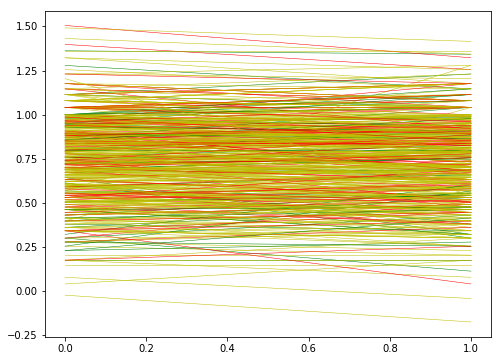

In [61]:
import matplotlib.pyplot as plt

# Select a number between 5 and len(df_adni_plasmaqc)
feature = 10

# Get unique RID list
rid_list = list(set(df_adni_plasmaqc.RID.values))

# Declare image
plt.figure(figsize=(8, 6))

# Define colors
c_dict = {
    'CN':'g',
    'LMCI':'y',
    'AD':'r'
}

# for each RID
for x in rid_list:
    # Get corresponding row(s)
    # Get m0, m12 value
    m0_row = df_adni_plasmaqc[(df_adni_plasmaqc["RID"] == x) & (df_adni_plasmaqc["Visit_Code"] == 'bl')]
    m12_row = df_adni_plasmaqc[(df_adni_plasmaqc["RID"] == x) & (df_adni_plasmaqc["Visit_Code"] == 'm12')]

    # if m12 is missing, continue
    if m12_row.empty:
        continue
    
    
    # Create list of values
    m0 = m0_row.iloc[0,feature]
    m12 = m12_row.iloc[0,feature]

    # Depending on the diagnosis, change the color
    dx = df_adnimerge[(df_adnimerge["RID"] == x) & (df_adnimerge["VISCODE"] == 'bl')].DX_bl.values
    dx, = dx
    c = c_dict[dx]
    # Plot it
    plt.plot([m0, m12], color=c, linewidth=0.5, markersize=1)

We see that we have only one follow-up, at m12, and some of them (about 60) are missing.

### Number of overlapping subjects and followups

Now we want to study how do the adni_qc_plasma and the white matter hyperintensities datasets overlap with each other, to see for which subjects and at which followups we have complete information of the biomarkers

In [ ]:
df_wmh_adni1 = pd.read_csv('UCD_ADNI1_WMH.csv')
df_wmh_adni1.rename(columns={'VISCODE': 'Visit_Code'}, inplace=True)
df_wmh_adni1['Visit_Code'] = df_wmh_adni1['Visit_Code'].replace('sc', 'bl')
result = pd.merge(df_adni_plasmaqc, df_wmh_adni1, how='inner', on=['RID', 'Visit_Code'])
result